##Carga desde el fichero

In [ ]:
#!unzip /content/train.csv.zip
!unzip train.csv.zip

unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


##Carga desde kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle competitions download -c udea-ai4eng-20241
!unzip udea-ai4eng-20241.zip

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


##Inicio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
z = pd.read_csv('train.csv')

##Preprocesado

In [ ]:
#GENERAMOS UNA COPIA:
zcopy = z.copy()

In [ ]:
z.head()

In [ ]:
zcopy.head()

###Funciones

In [ ]:
#FUNCIONES:
def mostrar_valores_unicos(dataframe, columna):
  valores_unicos = dataframe[columna].unique()
  print(f"Valores únicos en la columna {columna}:", valores_unicos.size)
  print(valores_unicos)



def reemplazar_si_no(dataframe, columna):
  # Definir el mapeo de valores numéricos para cada categoría
  mapeo_valores = {
    'Si': 1,
    'No': 0,
  }
  # Reemplazar los valores en la columna FAMI_ESTRATOVIVIENDA por los valores numéricos
  dataframe[columna] = dataframe[columna].replace(mapeo_valores)



def contar_nulos_si(dataframe, columna1, valor1, columna2):
  # Crear una máscara para identificar las filas donde ESTU_HORASSEMANATRABAJA es igual a cero
  mascara = (dataframe[columna1] == valor1)

  # Contar los valores nulos en la columna ESTU_PAGOMATRICULAPROPIO donde la máscara es True
  cantidad_nulos = dataframe.loc[mascara, columna2].isna().sum()
  print("Cantidad de valores nulos en ", columna2, " cuando ",columna1, " es ", valor1, ": ", cantidad_nulos)
  return None



def rellenar_nulos(dataframe, columna1, valor1, columna2, valor2):
  # Crear una máscara para identificar las filas donde ESTU_HORASSEMANATRABAJA es igual a cero
  mascara = (dataframe[columna1] == valor1)

  # Rellenar los valores nulos en la columna ESTU_PAGOMATRICULAPROPIO con cero en las filas donde la máscara es True
  dataframe.loc[mascara, columna2] = dataframe.loc[mascara, columna2].fillna(valor2)

  return None



def rellenar_nulos2(dataframe, columna1, valor1, columna2, valor2, columna3, valor3):

  # Crear una máscara para identificar las filas donde las dos columnas tienen los valores específicos
  mascara = (dataframe[columna1] == valor1) & (dataframe[columna2] == valor2)

  # Rellenar los valores nulos en la columna3 con valor3 en las filas donde la máscara es True
  dataframe.loc[mascara, columna3] = dataframe.loc[mascara, columna3].fillna(valor3)

  return None



def rellenar_nulos3(dataframe, columna1, valor1, columna2, valor2, columna3, valor3, columna4, valor4):

  # Crear una máscara para identificar las filas donde las tres columnas tienen los valores específicos
  mascara = (dataframe[columna1] == valor1) & (dataframe[columna2] == valor2) & (dataframe[columna3] == valor3)

  # Rellenar los valores nulos en la columna4 con valor4 en las filas donde la máscara es True
  dataframe.loc[mascara, columna4] = dataframe.loc[mascara, columna4].fillna(valor4)

  return None



def mostrar_valores_unicos_y_frecuencia(dataframe, columna, valores_a_mostrar=50):

  conteo_valores = dataframe[columna].value_counts(dropna=False)

  print("Conteo de valores en la columna ", columna, ": "  , conteo_valores.size)
  print(conteo_valores)
  print()
  print()
  conteo_valores.head(valores_a_mostrar)

  return None

In [ ]:
#graficas
import seaborn as sns
import matplotlib.pyplot as plt

def grafico_barras(df, ejex, ejey, inicio=0, elementos=0, tamaño_x=12, tamaño_y=6):

  # Crear un gráfico de barras
  #plt.figure(figsize=(tamaño_x, tamaño_y))
  num_categorias = len(df[ejex].value_counts())
  tamaño_x = min(tamaño_x, max(tamaño_y, num_categorias * 0.75))  # Tamaño mínimo de 6, máximo de 12
  tamaño_y = tamaño_x * 0.75

  # Crear un gráfico de barras
  plt.figure(figsize=(tamaño_x, tamaño_y))

  if elementos == 0:
    sns.countplot(data=df, x=ejex, hue=ejey, palette="Set2", order=df[ejex].value_counts().index)
  else:
    sns.countplot(data=df, x=ejex, hue=ejey, palette="Set2", order=df[ejex].value_counts().index[inicio:elementos])

  # Añadir etiquetas y título
  plt.xlabel(ejex)
  plt.ylabel(ejey)
  plt.title("Distribución del " + ejey + " por " + ejex)

  # Rotar las etiquetas del eje x para una mejor visualización
  plt.xticks(rotation=90)

  # Ajustar la leyenda
  plt.legend(title=ejey, loc="upper right")

  # Mostrar el gráfico
  plt.tight_layout()
  plt.show()

  return None

###Borrar columnas innecesarias

In [ ]:
#BORRAR COLUMNA ESTU_PRIVADO_LIBERTAD: porque todos los datos son iguales
zcopy.drop(columns=["ESTU_PRIVADO_LIBERTAD"], inplace=True)
#BORRAR COLUMNA FAMI_TIENEINTERNET.1: porque hay 2 columnas iguales
zcopy.drop(columns=["FAMI_TIENEINTERNET.1"], inplace=True)

#zcopy.head()

###Mapeo de valores de las columnas

In [ ]:
mostrar_valores_unicos(zcopy, "ESTU_VALORMATRICULAUNIVERSIDAD")

# Definir el mapeo de valores numéricos para cada categoría
mapeo_valores = {
  'Entre 5.5 millones y menos de 7 millones':6,
  'Entre 2.5 millones y menos de 4 millones':4,
  'Entre 4 millones y menos de 5.5 millones':5,
  'Más de 7 millones':7,
  'Entre 1 millón y menos de 2.5 millones':3,
  'Entre 500 mil y menos de 1 millón':2,
  'Menos de 500 mil':1,
  'No pagó matrícula':0,
}

zcopy["ESTU_VALORMATRICULAUNIVERSIDAD"] = zcopy["ESTU_VALORMATRICULAUNIVERSIDAD"].replace(mapeo_valores)

Valores únicos en la columna ESTU_VALORMATRICULAUNIVERSIDAD: 9
['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula' nan]


In [ ]:
mostrar_valores_unicos(zcopy, "FAMI_EDUCACIONPADRE")

# Definir el mapeo de valores numéricos para cada categoría
mapeo_valores = {
  'No sabe' :0,
  'Ninguno':0,
  'No Aplica':0,
  'Primaria incompleta':0,
  'Primaria completa':1,
  'Secundaria (Bachillerato) incompleta' :1,
  'Secundaria (Bachillerato) completa':2,
  'Técnica o tecnológica incompleta':2,
  'Educación profesional incompleta':2,
  'Técnica o tecnológica completa':3,
  'Educación profesional completa' :4,
  'Postgrado':5
}

zcopy["FAMI_EDUCACIONPADRE"] = zcopy["FAMI_EDUCACIONPADRE"].replace(mapeo_valores)
zcopy["FAMI_EDUCACIONMADRE"] = zcopy["FAMI_EDUCACIONMADRE"].replace(mapeo_valores)

Valores únicos en la columna FAMI_EDUCACIONPADRE: 13
['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' nan
 'Secundaria (Bachillerato) incompleta' 'Ninguno' 'No Aplica']


In [ ]:
mostrar_valores_unicos(zcopy, "ESTU_HORASSEMANATRABAJA")

# Definir el mapeo de valores numéricos para cada categoría
mapeo_valores = {
  '0': 0,
  'Menos de 10 horas': 1,
  'Entre 11 y 20 horas': 2,
  'Entre 21 y 30 horas': 3,
  'Más de 30 horas': 4,
}

zcopy["ESTU_HORASSEMANATRABAJA"] = zcopy["ESTU_HORASSEMANATRABAJA"].replace(mapeo_valores)

Valores únicos en la columna ESTU_HORASSEMANATRABAJA: 6
['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' nan]


In [ ]:
mostrar_valores_unicos(zcopy, "FAMI_ESTRATOVIVIENDA")

# Definir el mapeo de valores numéricos para cada categoría
mapeo_valores = {
  'Estrato 1': 1,
  'Estrato 2': 2,
  'Estrato 3': 3,
  'Estrato 4': 4,
  'Estrato 5': 5,
  'Estrato 6': 6,
  'Sin Estrato': 0, #PENDIENTE PA REVISAR
}

zcopy["FAMI_ESTRATOVIVIENDA"] = zcopy["FAMI_ESTRATOVIVIENDA"].replace(mapeo_valores)

Valores únicos en la columna FAMI_ESTRATOVIVIENDA: 8
['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' nan
 'Estrato 6' 'Sin Estrato']


In [ ]:
columnas_si_no = ["FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", "FAMI_TIENEAUTOMOVIL", "ESTU_PAGOMATRICULAPROPIO", "FAMI_TIENECOMPUTADOR"]

for columna in columnas_si_no:
  reemplazar_si_no(zcopy, columna)

###Visualizar estado de limpieza

In [ ]:
#COLUMNAS CON DATOS FALTANTES:
columnas_con_faltantes = zcopy.columns[zcopy.isnull().any()]

# Mostrar las columnas con valores faltantes
print("Columnas con valores faltantes:", columnas_con_faltantes.size)
for columna in columnas_con_faltantes:
  print(columna, ": ",z[columna].isna().sum())
  print(columna, ": ",zcopy[columna].isna().sum())
  print("valores corregidos: ", z[columna].isna().sum() - zcopy[columna].isna().sum())
  print()

Columnas con valores faltantes: 10
ESTU_VALORMATRICULAUNIVERSIDAD :  6287
ESTU_VALORMATRICULAUNIVERSIDAD :  4603
valores corregidos:  1684

ESTU_HORASSEMANATRABAJA :  30857
ESTU_HORASSEMANATRABAJA :  10041
valores corregidos:  20816

FAMI_ESTRATOVIVIENDA :  32137
FAMI_ESTRATOVIVIENDA :  11318
valores corregidos:  20819

FAMI_TIENEINTERNET :  26629
FAMI_TIENEINTERNET :  4684
valores corregidos:  21945

FAMI_EDUCACIONPADRE :  23178
FAMI_EDUCACIONPADRE :  2401
valores corregidos:  20777

FAMI_TIENELAVADORA :  39773
FAMI_TIENELAVADORA :  16529
valores corregidos:  23244

FAMI_TIENEAUTOMOVIL :  43623
FAMI_TIENEAUTOMOVIL :  17696
valores corregidos:  25927

ESTU_PAGOMATRICULAPROPIO :  6498
ESTU_PAGOMATRICULAPROPIO :  3777
valores corregidos:  2721

FAMI_TIENECOMPUTADOR :  38103
FAMI_TIENECOMPUTADOR :  14996
valores corregidos:  23107

FAMI_EDUCACIONMADRE :  23664
FAMI_EDUCACIONMADRE :  2880
valores corregidos:  20784



###Rellenar obviedades

In [ ]:
contar_nulos_si(zcopy, "FAMI_ESTRATOVIVIENDA", 6, "FAMI_TIENEINTERNET")

Cantidad de valores nulos en  FAMI_TIENEINTERNET  cuando  FAMI_ESTRATOVIVIENDA  es  6 :  62


In [ ]:
estratos = [4,5,6]
for i in estratos:
  rellenar_nulos(zcopy, "FAMI_ESTRATOVIVIENDA", i, "FAMI_TIENEINTERNET", 1)
  rellenar_nulos(zcopy, "FAMI_ESTRATOVIVIENDA", i, "FAMI_TIENECOMPUTADOR", 1)
  rellenar_nulos(zcopy, "FAMI_ESTRATOVIVIENDA", i, "FAMI_TIENELAVADORA", 1)
  if i!=4:
    rellenar_nulos(zcopy, "FAMI_ESTRATOVIVIENDA", i, "FAMI_TIENEAUTOMOVIL", 1)


rellenar_nulos(zcopy, "FAMI_ESTRATOVIVIENDA", 1, "FAMI_TIENEAUTOMOVIL", 0)

rellenar_nulos(zcopy, "FAMI_TIENEAUTOMOVIL", 1, "FAMI_TIENELAVADORA", 1)
rellenar_nulos(zcopy, "FAMI_TIENEAUTOMOVIL", 1, "FAMI_TIENEINTERNET", 1)
rellenar_nulos(zcopy, "FAMI_TIENEAUTOMOVIL", 1, "FAMI_TIENECOMPUTADOR", 1)

rellenar_nulos(zcopy, "FAMI_TIENECOMPUTADOR", 1, "FAMI_TIENEINTERNET", 1)

rellenar_nulos(zcopy, "ESTU_HORASSEMANATRABAJA", 0, "ESTU_PAGOMATRICULAPROPIO", 0)



#EJEMPLOS DE LA ESTRUCTURA (NO DESCOMENTAR)
#rellenar_nulos(zcopy, "ESTU_PAGOMATRICULAPROPIO", 1, "ESTU_HORASSEMANATRABAJA", ?)
#rellenar_nulos2(zcopy, "FAMI_ESTRATOVIVIENDA", 1, "FAMI_TIENEINTERNET", 1, "FAMI_TIENEINTERNET", 1)
#rellenar_nulos3(zcopy, "FAMI_ESTRATOVIVIENDA", 1, "FAMI_TIENEINTERNET", 1, "FAMI_TIENEINTERNET", 1, "FAMI_TIENEINTERNET", 1,):

###Eliminar filas con muchos valores NAN (PENDIENTE VERIFICAR LA CONVENIENCIA)

In [ ]:
#Copia
zz = zcopy.copy()

In [ ]:
#Restaurar zcopy
zcopy = zz.copy()

In [ ]:
umbral = 8
print("Filas con más de ", umbral, " columnas vacías: ", sum(z.isnull().sum(axis=1) >= umbral) )
print("Filas con más de ", umbral, " columnas vacías: ", sum(zcopy.isnull().sum(axis=1) >= umbral) )

Filas con más de  8  columnas vacías:  21740
Filas con más de  8  columnas vacías:  20819


In [ ]:
zcopy = zcopy[zcopy.isnull().sum(axis=1) < umbral]

###Rellenar valores NAN

In [ ]:
zcopy = zcopy.fillna(0)


###Reemplazar carreras por facultades
Todas deben revisarse exhaustivamente

In [ ]:
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('INGENIERIA|INGENIER¿A|INGENIERÍA|acui|ing|compu', case=False), 'ESTU_PRGM_ACADEMICO'] = 'ingenieria'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('licenciatura|peda', case=False), 'ESTU_PRGM_ACADEMICO'] = 'educacion'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('econom|contadur|empresas|contabilidad|internaci|finan|comerci|negocios|mark|empr|merc', case=False), 'ESTU_PRGM_ACADEMICO'] = 'economia y negocios'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('derecho|política|politica|crimin|investi|gob|pol|juris|desa', case=False), 'ESTU_PRGM_ACADEMICO'] = 'derecho'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('social|psicolog|sicolog|psi|periodismo|antropolog|fami|sociol|geog', case=False), 'ESTU_PRGM_ACADEMICO'] = 'ciencias sociales'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('veteri|zoo|agro', case=False), 'ESTU_PRGM_ACADEMICO'] = 'veterinaria'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('medic|salud|enfer|odonto|fisio|nutri|quiru|terap|fonoaud|bacte|geron|optom', case=False), 'ESTU_PRGM_ACADEMICO'] = 'salud'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('dise|art|mus|audi|teat|publicidad|produ|cine|dram|danz|maestro|foto|publ|mús|anim|band|mueb', case=False), 'ESTU_PRGM_ACADEMICO'] = 'artes'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('admi|hote|turi', case=False), 'ESTU_PRGM_ACADEMICO'] = 'administracion'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('gastro|culin', case=False), 'ESTU_PRGM_ACADEMICO'] = 'gastronomia'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('farm', case=False), 'ESTU_PRGM_ACADEMICO'] = 'farmacia'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('arqui|const|urba', case=False), 'ESTU_PRGM_ACADEMICO'] = 'arquitectura'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('depor|recre', case=False), 'ESTU_PRGM_ACADEMICO'] = 'deporte'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('filo|hist|lite|ling|arque|cult|bibli|arch|leng|teo', case=False), 'ESTU_PRGM_ACADEMICO'] = 'humanidades'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('quim|fis|bio|geol|mat|micr|eco|ASTRONOMIA|quí|fí|estad|geo|ambi', case=False), 'ESTU_PRGM_ACADEMICO'] = 'exactas y naturales'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('milit|mari|nav', case=False), 'ESTU_PRGM_ACADEMICO'] = 'fuerzas armadas'
zcopy.loc[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('comu|narra|sis|info', case=False), 'ESTU_PRGM_ACADEMICO'] = 'comunicacion'



####Otros

In [ ]:
#df_carrera = zcopy[(zcopy['ESTU_PRGM_ACADEMICO'].str.contains('INGENIERIA|INGENIER¿A|INGENIERÍA', case=False)) & (zcopy['ESTU_PRGM_ACADEMICO'].str.contains('ingenier', case=False))]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('arte|dise|músi|musi|teatr|cine|audio|producci', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('medic|salud|enfer|odonto|fisio|nutri|quiru|terap|bacte', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('veteri|zoo|agro', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('dise|art|mus|audi|teat|publicidad|produ|cine|dram|danz', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('hote|turi', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('admi', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('gastro|culin', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('farm', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('arqui|const', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('filo|hist|lite|ling|arque|cult|bibli|arch|leng|teo|geog', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('depor', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('quim|fis|bio|geol|mat|micr', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('milit|mari|nav', case=False)]
#df_carrera = zcopy[zcopy['ESTU_PRGM_ACADEMICO'].str.contains('info', case=False)]


#mostrar_valores_unicos(df_carrera, "ESTU_PRGM_ACADEMICO")


In [ ]:
mostrar_valores_unicos(zcopy, "ESTU_PRGM_ACADEMICO")

Valores únicos en la columna ESTU_PRGM_ACADEMICO: 15
['salud' 'derecho' 'exactas y naturales' 'ciencias sociales' 'veterinaria'
 'ingenieria' 'administracion' 'educacion' 'artes' 'arquitectura'
 'farmacia' 'deporte' 'humanidades' 'comunicacion' 'fuerzas armadas']


In [ ]:
#Pasar a valor numérico

mapeo_valores = {
  'salud': 1,
  'derecho': 2,
  'exactas y naturales': 3,
  'ciencias sociales': 4,
  'veterinaria': 5,
  'ingenieria': 6,
  'administracion': 7,
  'educacion': 8,
  'artes': 9,
  'arquitectura': 10,
  'farmacia': 11,
  'deporte': 12,
  'humanidades': 13,
  'comunicacion': 14,
  'fuerzas armadas': 15,
}

zcopy["ESTU_PRGM_ACADEMICO"] = zcopy["ESTU_PRGM_ACADEMICO"].replace(mapeo_valores)

In [ ]:
mostrar_valores_unicos_y_frecuencia(zcopy, "ESTU_PRGM_ACADEMICO")

Conteo de valores en la columna  ESTU_PRGM_ACADEMICO :  15
ESTU_PRGM_ACADEMICO
3     194844
6     157385
4      80411
1      73030
2      59728
8      58841
9      26835
10     12079
5       8238
13      6647
7       6280
12      3684
15      1734
11      1538
14      1226
Name: count, dtype: int64




In [ ]:
filtro = zcopy.loc[zcopy["ESTU_VALORMATRICULAUNIVERSIDAD"] == 7]
filtro.head(50)

###Reemplazar departamentos por regiones

In [ ]:
zcopy.loc[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('antio|boya|cald|cundi|huila|bogo|santan|quind|risar|toli', case=False), 'ESTU_PRGM_DEPARTAMENTO'] = 'andina'
zcopy.loc[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('amazo|caque|guavia|putu|vau', case=False), 'ESTU_PRGM_DEPARTAMENTO'] = 'amazonica'
zcopy.loc[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('valle|choc|nari|cauc', case=False), 'ESTU_PRGM_DEPARTAMENTO'] = 'pacifico'
zcopy.loc[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('arau|casan|meta', case=False), 'ESTU_PRGM_DEPARTAMENTO'] = 'orinoquia'
zcopy.loc[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('atlantico|bolivar|cesar|cordoba|guajira|magdalena|sucre', case=False), 'ESTU_PRGM_DEPARTAMENTO'] = 'caribe'
zcopy.loc[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('andr', case=False), 'ESTU_PRGM_DEPARTAMENTO'] = 'insular'



In [ ]:
#df_departamento = zcopy[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('antio|boya|cald|cundi|huila|bogo|santan|quind|risar|toli', case=False)]
#df_departamento = zcopy[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('amazo|caque|guavia|putu', case=False)]
#df_departamento = zcopy[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('valle|choc|nari|cauc', case=False)]
#df_departamento = zcopy[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('atlantico|bolivar|cesar|cordoba|guajira|magdalena|sucre', case=False)]
#df_departamento = zcopy[zcopy['ESTU_PRGM_DEPARTAMENTO'].str.contains('arau|casan|meta', case=False)]


mostrar_valores_unicos(df_departamento, "ESTU_PRGM_DEPARTAMENTO")

Valores únicos en la columna ESTU_PRGM_DEPARTAMENTO: 7
['ATLANTICO' 'SUCRE' 'BOLIVAR' 'CORDOBA' 'LA GUAJIRA' 'CESAR' 'MAGDALENA']


In [ ]:
mostrar_valores_unicos(zcopy, "ESTU_PRGM_DEPARTAMENTO")

Valores únicos en la columna ESTU_PRGM_DEPARTAMENTO: 6
[1 2 3 4 5 6]


In [ ]:
#Pasar a valor numérico

mapeo_valores = {
  'andina': 1,
  'caribe': 2,
  'amazonica': 3,
  'pacifico': 4,
  'orinoquia': 5,
  'insular': 6,
}

zcopy["ESTU_PRGM_DEPARTAMENTO"] = zcopy["ESTU_PRGM_DEPARTAMENTO"].replace(mapeo_valores)

In [ ]:
mostrar_valores_unicos_y_frecuencia(zcopy, "ESTU_PRGM_DEPARTAMENTO")

Conteo de valores en la columna  ESTU_PRGM_DEPARTAMENTO :  6
ESTU_PRGM_DEPARTAMENTO
1    499712
2    105080
4     73802
5     10351
3      3545
6        10
Name: count, dtype: int64




###Gráficas (para pruebas futuras)

In [ ]:
mostrar_valores_unicos_y_frecuencia(df_carrera, "ESTU_PRGM_ACADEMICO")

Conteo de valores en la columna  ESTU_PRGM_ACADEMICO :  3
ESTU_PRGM_ACADEMICO
MEDICINA                            17588
MEDICINA VETERINARIA Y ZOOTECNIA     2795
MEDICINA VETERINARIA                 2475
Name: count, dtype: int64




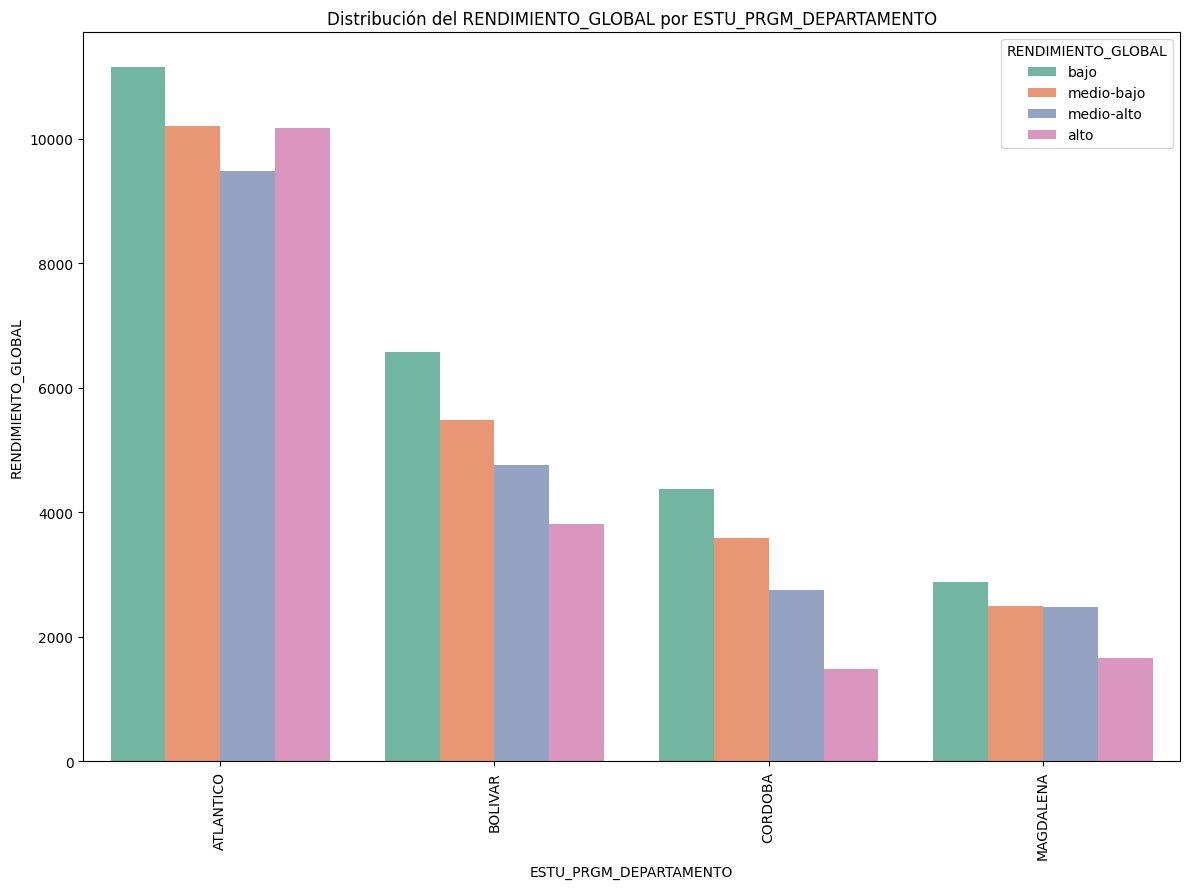

In [ ]:
#grafico_barras(df_carrera, "ESTU_PRGM_ACADEMICO", "RENDIMIENTO_GLOBAL", inicio= 0, elementos=4, tamaño_y=100)
#grafico_barras(df_carrera, "ESTU_PRGM_ACADEMICO", "RENDIMIENTO_GLOBAL", inicio= 2, elementos=6, tamaño_y=100)
#grafico_barras(df_carrera, "ESTU_PRGM_ACADEMICO", "RENDIMIENTO_GLOBAL", inicio= 6, elementos=11, tamaño_y=100)
grafico_barras(df_departamento, "ESTU_PRGM_DEPARTAMENTO", "RENDIMIENTO_GLOBAL", inicio= 0, elementos=4, tamaño_y=100)

In [ ]:
import matplotlib.pyplot as plt

# Obtener el conteo de valores en la columna FAMI_ESTRATOVIVIENDA, incluyendo NaN
conteo_valores = zcopy["FAMI_ESTRATOVIVIENDA"].value_counts(dropna=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_valores.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título al gráfico
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en la columna FAMI_ESTRATOVIVIENDA")

# Mostrar el gráfico
plt.show()


In [ ]:
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=zcopy, x="FAMI_ESTRATOVIVIENDA", hue="RENDIMIENTO_GLOBAL", palette="Set2")

# Añadir etiquetas y título
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Cantidad de Estudiantes")
plt.title("Distribución del Rendimiento Global por Estrato de Vivienda")
plt.legend(title="Rendimiento Global", loc="upper right")

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



In [ ]:
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=zcopy, x="PERIODO", hue="RENDIMIENTO_GLOBAL", palette="Set2")

# Añadir etiquetas y título
plt.xlabel("Período")
plt.ylabel("Cantidad de Estudiantes")
plt.title("Distribución del Rendimiento Global por Período")
plt.legend(title="Rendimiento Global", loc="upper right")

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


<ipython-input-237-1a4cb5f7f88d>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


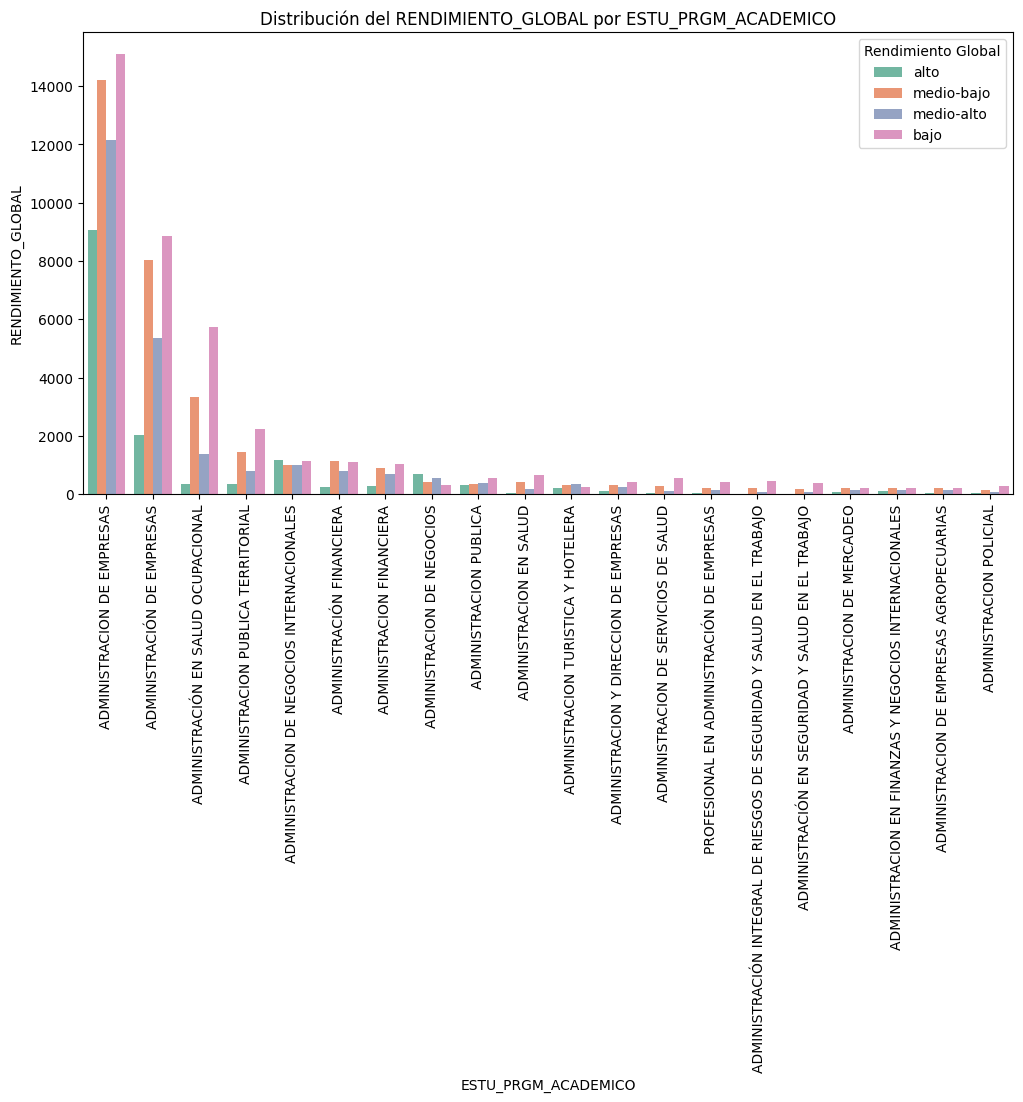

In [ ]:
import seaborn as sns

dat_frame = df_carrera
ejex = "ESTU_PRGM_ACADEMICO"
ejey = "RENDIMIENTO_GLOBAL"

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
#sns.countplot(data=dat_frame, x= ejex, hue= ejey, palette="Set2", order=dat_frame[ejex].value_counts().index)
sns.countplot(data=dat_frame, x= ejex, hue= ejey, palette="Set2", order=dat_frame[ejex].value_counts().index[:20])


# Añadir etiquetas y título
plt.xlabel(ejex)
plt.ylabel(ejey)
plt.title("Distribución del " + ejey +" por " + ejex)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Ajustar la leyenda
plt.legend(title= ejey, loc="upper right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()
